# Audio and Digital Signal Processing(DSP) in Phython
### Basic Sound Processing in Phython

In [8]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

## 1. Generate Signal by Phasor

### 1.1 Parameter Setting

In [16]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 200       # sine frequency, Hz

* amplitude : amp=1, (-1, 1), amp=2, (-2, 2)
* Sampling Rate(SR): 디지털 오디오 기기에서 아날로그 신호를 디지털로 변환하기 위해 초당 샘플을 수치로 표현한 것, 음질 또는 해상도에 영향을 미침(단위: 헤르츠(Hz), 1Hz는 초당 1번의 샘플을 의미) 
* Frequency(Freq) : sine wave가 1초에 몇 번 반복되는가 -> 주파 및 음의 높낮이를 결정, frequency 높을수록 음이 높음
    * 모든 소리는 다양한 sine wave의 합으로 구성
    * 음의 강도는 진폭과 관련, 음의 강도와 높낮이는 독립적으로 결정됨
* signal, time series, temporal ~~

### 1.2 Generate A Time Sample

In [17]:
# generate time sample
t = np.arange(1, sr * dur +1)/sr # 1/10000부터 1/2까지 총 10000개의 time sample의 array를 만들어라.
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [18]:
len(t)

5000

In [21]:
t2 = np.arrange(1, sr * dur)/sr
t2

AttributeError: module 'numpy' has no attribute 'arrange'

### 1.3 Generate A Phase

In [16]:
# generate phase
theta = t * 2*np.pi * freq  # freq를 통해 각도 단위를 시간 단위로 변화 
theta  
# 한 주기 안의 모든 시간(t)dmf 2pi(360도)에 할당하고 주기값(freq)을 포함하여 각도의 단위를 바꿈
# 시간을 도입하여야 signal의 실체(physics)가 존재할 수 없음

array([1.88495559e-01, 3.76991118e-01, 5.65486678e-01, ...,
       9.42100805e+02, 9.42289301e+02, 9.42477796e+02])

In [17]:
len(theta) # equal to len(t)

5000

### 1.4 Generate Signal by Cosine-Phasor

In [18]:
# generate signal by cosine-phasor
signal =np.sin(theta)   # angle(radian) may be input
signal

array([ 1.87381315e-01,  3.68124553e-01,  5.35826795e-01, ...,
       -3.68124553e-01, -1.87381315e-01, -5.09502587e-14])

In [19]:
len(signal) # equal to len(t)

5000

In [20]:
radian = angle*pi/180  # transform angle to radian

NameError: name 'angle' is not defined

### 1.5 PLOT
점의 개수 = 샘플의 개수
샘플의 갯수와 시간의 관계?

Text(0, 0.5, 'real')

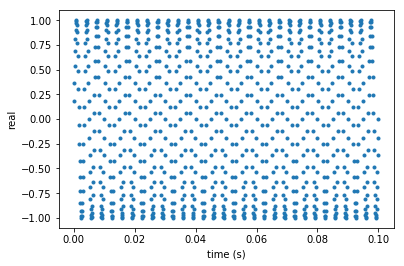

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], signal[0:1000], '.')
ax.set_xlabel('time (s)') # setting axis' label
ax.set_ylabel('real')

### PLAY THE AUDIO

In [12]:
ipd.Audio(signal, rate=sr) # frequency가 너무 낮으면 안 들림

## 2. Generate Signal by Complex-Phasor

In [23]:
# generate signal by complex-phasor
c = np.exp(theta*1j) #exponential #complex number
c #the only variable, theta, the number of vectors of c = the number of vectors of theta

array([0.98228725+1.87381315e-01j, 0.92977649+3.68124553e-01j,
       0.84432793+5.35826795e-01j, ..., 0.92977649-3.68124553e-01j,
       0.98228725-1.87381315e-01j, 1.        -5.09502587e-14j])

In [ ]:
print(np.exp(np.pi*1j))
print(np.exp(np.pi/2*1j))

In [24]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j) #exponential #complex number
c #the only variable, theta, the number of vectors of c = the number of theta

array([0.98228725+1.87381315e-01j, 0.92977649+3.68124553e-01j,
       0.84432793+5.35826795e-01j, ..., 0.92977649-3.68124553e-01j,
       0.98228725-1.87381315e-01j, 1.        -5.09502587e-14j])

Text(0.5, 0, 'imag')

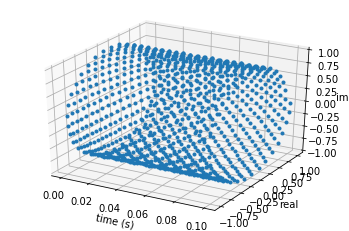

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)') 
ax.set_ylabel('real') # 실수부만 보면 cos함수
ax.set_zlabel('imag') # 허수부만 보면 sin함수

In [26]:
ipd.Audio(signal, rate=sr)

# -----------------------------------------------------------------
# Generate Pulse Train

In [36]:
len(range(F0, Fend+1, F0))

50

<IPython.core.display.Javascript object>


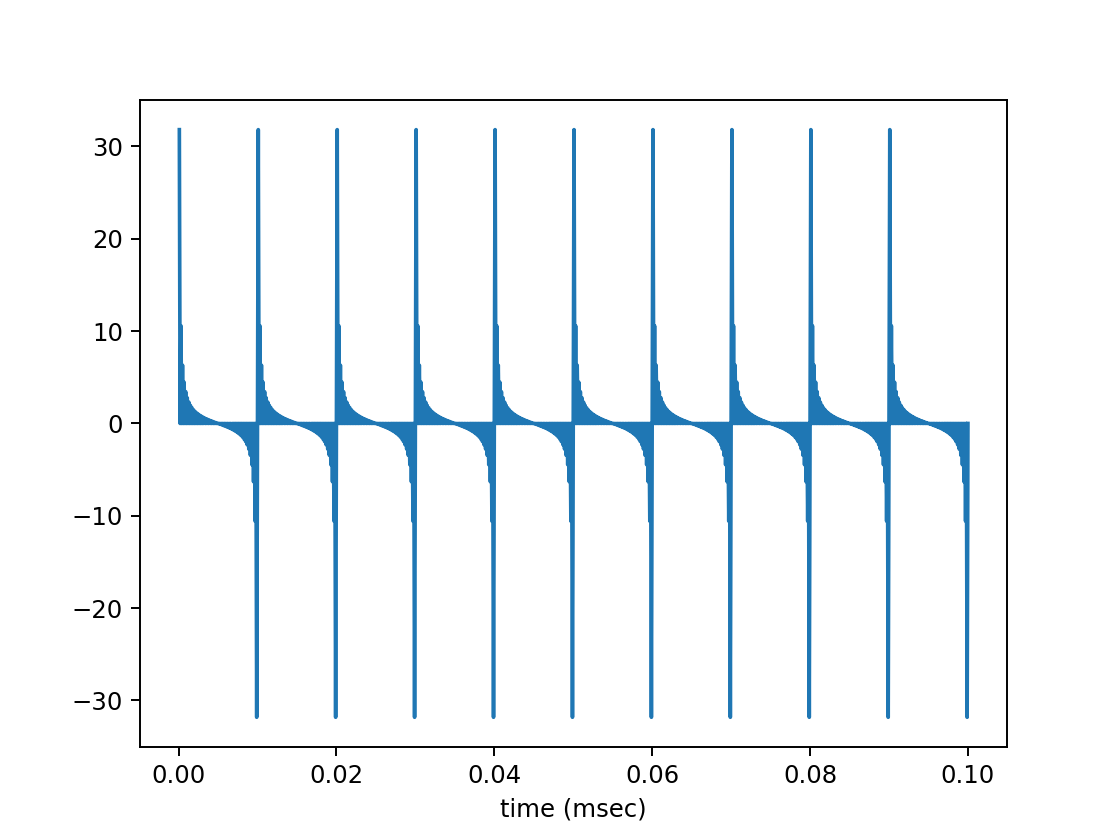

In [35]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

In [12]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [13]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [14]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [15]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [16]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [17]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [19]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [20]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [21]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

Text(0, 0.5, 'amplitude')

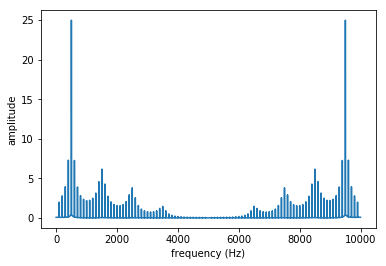

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [23]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [24]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22d1c0131d0>)

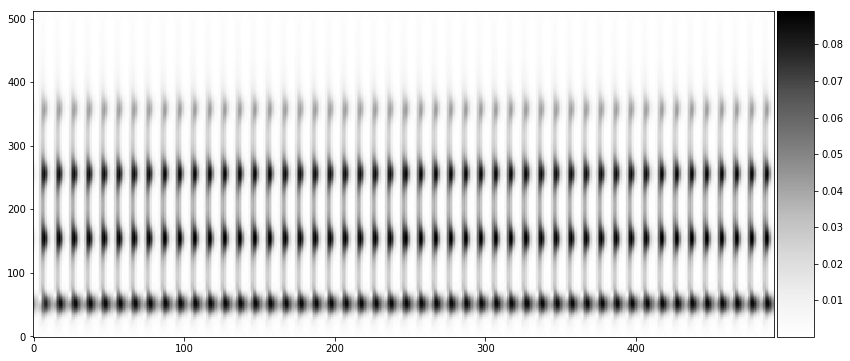

In [25]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

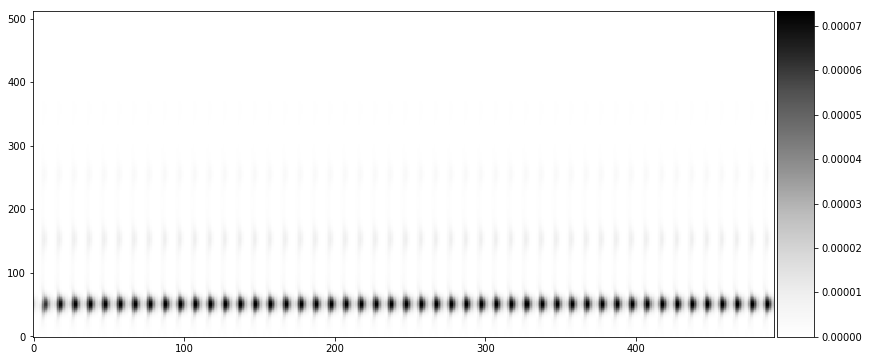

In [103]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

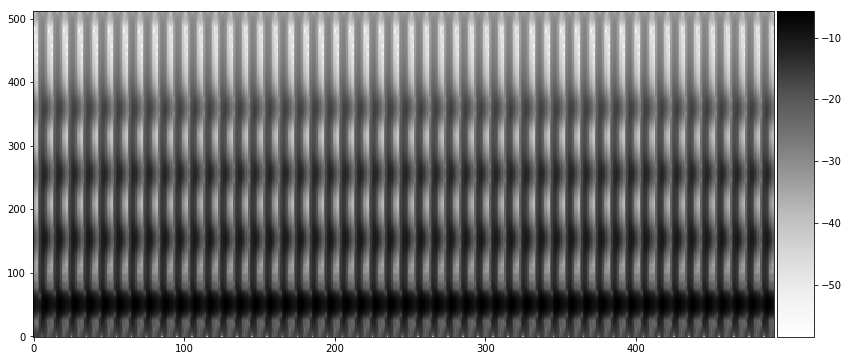

In [104]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

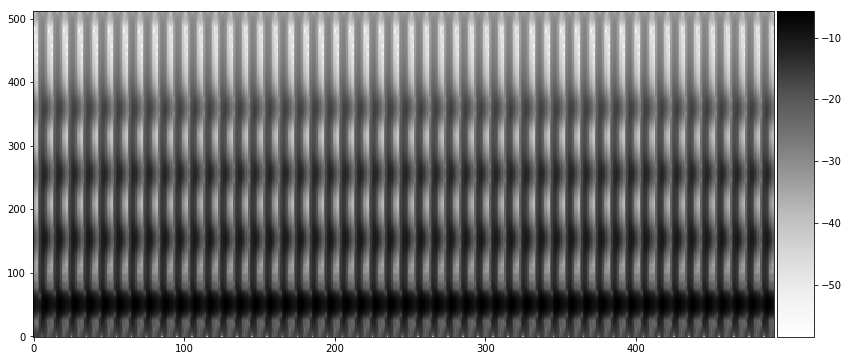

In [105]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);